<a href="https://colab.research.google.com/github/priba/kornia-examples/blob/master/filter_edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Edge filtering operations

In this tutorial we are going to learn how to compute the first order and second order derivatives of an image using `kornia.filters`.

## Install Kornia

In [1]:
!pip install git+https://github.com/arraiyopensource/kornia

import kornia
print(f"Kornia version: {kornia.__version__}")

  Cloning https://github.com/arraiyopensource/kornia to /tmp/pip-req-build-cc_5woj4
  Running command git clone -q https://github.com/arraiyopensource/kornia /tmp/pip-req-build-cc_5woj4
  Created wheel for kornia: filename=kornia-0.1.2+85ef4c0-py2.py3-none-any.whl size=126610 sha256=ae8d3e20f84e7070a38aeb17de2f8e5a029309c3827ea3353ce6fee5f5771f1a
  Stored in directory: /tmp/pip-ephem-wheel-cache-mi0z_i2h/wheels/a0/47/86/854e2f9a801b368f296cb25f167cbd56aa805f974b15421a67
Successfully built kornia
  Found existing installation: kornia 0.1.2+1eb68dd
    Uninstalling kornia-0.1.2+1eb68dd:
      Successfully uninstalled kornia-0.1.2+1eb68dd
Kornia version: 0.1.2+85ef4c0


## Prepare the data
Download an example image

In [2]:
!wget https://raw.githubusercontent.com/kornia/kornia-examples/master/data/filter/drslump.jpg

--2019-12-14 11:22:00--  https://raw.githubusercontent.com/kornia/kornia-examples/master/data/filter/drslump.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60020 (59K) [image/jpeg]
Saving to: ‘drslump.jpg.4’

drslump.jpg.4       100%[===================>]  58.61K  --.-KB/s    in 0.03s   

2019-12-14 11:22:01 (2.08 MB/s) - ‘drslump.jpg.4’ saved [60020/60020]



Load the image using OpenCV and plot it

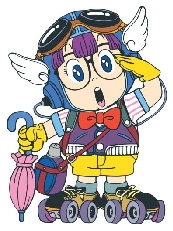

In [3]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# load using opencv and convert to RGB
img_bgr: np.array = cv2.imread('drslump.jpg', cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.axis('off');

Create a batch of 4 identical images and normalize it between [0,1]

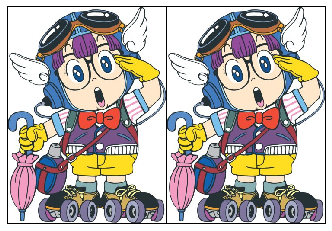

In [4]:
import torch
import torchvision

def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2)
    out_np: np.array = kornia.tensor_to_image(out)
    plt.imshow(out_np); plt.axis('off');

# stack four identical images
data: torch.Tensor = kornia.image_to_tensor(img_rgb)  # 1xCxHxW
data = data.expand(2, -1, -1, -1)  # 2xCxHxW

# normalize
data = kornia.normalize(data.float(), torch.zeros(3), 255. * torch.ones(3)).contiguous()

# plot
imshow(data)

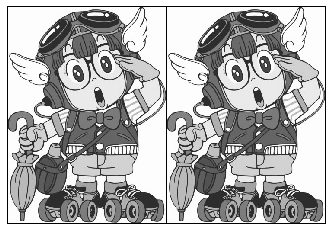

In [5]:
# to gray
x_gray = kornia.rgb_to_grayscale(data)
# plot
imshow(x_gray)

## Filtering Operations
### Compute the 1st order derivates



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


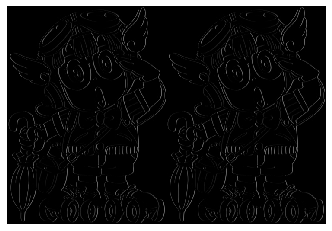

In [6]:
grads: torch.Tensor = kornia.spatial_gradient(x_gray, order=1) # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

imshow(grads_x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


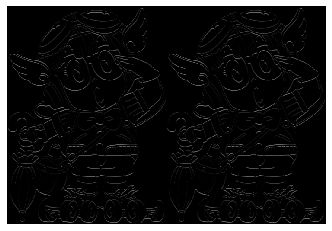

In [7]:
imshow(grads_y)

### Sobel Edges

Once with the gradients in the two directions we can computet the Sobel edges. However, in kornia we already have it implemented.

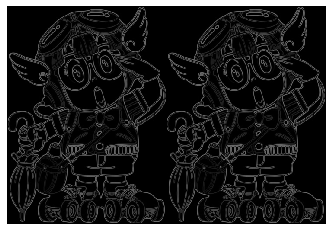

In [8]:
x_sobel: torch.Tensor = kornia.sobel(x_gray)
imshow(x_sobel)

### Compute the 2nd order derivates


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


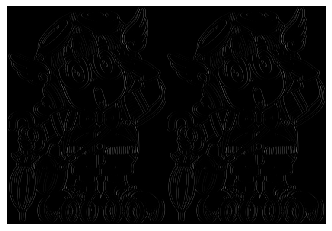

In [9]:
grads: torch.Tensor = kornia.spatial_gradient(x_gray, order=2) # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

imshow(grads_x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


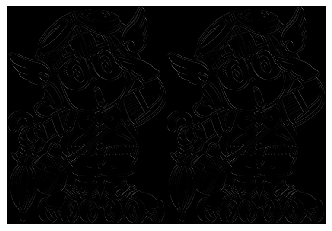

In [10]:
imshow(grads_y)

### Laplacian Edges

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


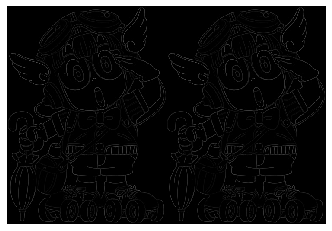

In [11]:
x_laplacian: torch.Tensor = kornia.laplacian(x_gray, kernel_size=5)
imshow(x_laplacian)